In [149]:
import theano
from theano import tensor as T
import lasagne
from lasagne.layers import *
from lasagne.nonlinearities import *
from lasagne.objectives import *
from lasagne.regularization import *
from lasagne.random import get_rng
from lasagne.updates import *
from lasagne.init import *
import numpy as np
import sys
sys.path.append("../../modules/")
import helper as hp

import matplotlib.pyplot as plt
%matplotlib inline

import os
import cPickle as pickle

import deep_residual_learning_CIFAR10

import math

In [83]:
data = deep_residual_learning_CIFAR10.load_data()
sys.stderr.write("loading smaller version of cifar10...\n")
X_train_and_valid, y_train_and_valid, X_test, y_test = \
    data["X_train"], data["Y_train"], data["X_test"], data["Y_test"]
X_train = X_train_and_valid[ 0 : 0.9*X_train_and_valid.shape[0] ]
y_train = y_train_and_valid[ 0 : 0.9*y_train_and_valid.shape[0] ]
X_valid = X_train_and_valid[ 0.9*X_train_and_valid.shape[0] :: ]
y_valid = y_train_and_valid[ 0.9*y_train_and_valid.shape[0] :: ]

loading smaller version of cifar10...
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [102]:
def disp_form(img):
    return np.transpose(img, [2,1,0])

In [126]:
new_X_train = []
for img in X_train:
    tmp = np.zeros((3,40,40))
    tmp[:, 4:-4, 4:-4] = img
    new_X_train.append(tmp)

new_X_valid = []
for img in X_valid:
    tmp = np.zeros((3,40,40))
    tmp[:, 4:-4, 4:-4] = img
    new_X_valid.append(tmp)
    
new_X_test = []
for img in X_test:
    tmp = np.zeros((3,40,40))
    tmp[:, 4:-4, 4:-4] = img
    new_X_test.append(tmp)    

In [147]:
new_X_train = np.asarray(new_X_train)
print new_X_train.shape

#new_X_valid = np.asarray(new_X_valid)
#print new_X_valid.shape

#new_X_test = np.asarray(new_X_test)
#print new_X_test.shape

(450, 3, 40, 40)


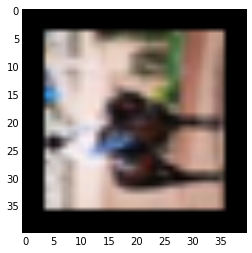

In [128]:
img = new_X_train[8]
plt.imshow(disp_form(new_X_train[11]))

In [138]:
def extract_crop(img):
    rand_x, rand_y = np.random.randint(0,9), np.random.randint(0,9)
    return img[:,rand_x:rand_x+32,rand_y:rand_y+32]

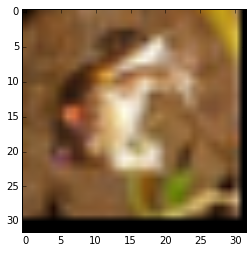

In [146]:
plt.imshow( disp_form(extract_crop(new_X_train[0])) )

In [148]:
np.savez("cifar10.npz", 
    X_train=new_X_train, 
    y_train=y_train, 
    X_valid=X_valid, 
    y_valid=y_valid,
    X_test=X_test,
    y_test=y_test
)

In [124]:
new_X_train.shape, y_train.shape, new_X_valid.shape, y_valid.shape, new_X_test.shape, y_test.shape

((450, 3, 36, 36), (450,), (50, 3, 36, 36), (50,), (500, 3, 36, 36), (500,))